# Numpy and Matplotlib

These are two of the most fundamental parts of the scientific python “ecosystem”. Most everything else is built on top of them.

In [1]:
import numpy as np

What did we just do? We imported a package. This brings new variables (mostly functions) into our interpreter. We access them as follows.

In [2]:
# find out what is in our namespace
dir()

['In',
 'Out',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'exit',
 'get_ipython',
 'np',
 'quit']

In [3]:
# find out what's in numpy
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_distributor_init',
 '_global

In [4]:
# find out what version we have
np.__version__

'1.19.5'

The numpy documentation is crucial!

http://docs.scipy.org/doc/numpy/reference/

## NDArrays
The core class is the numpy ndarray (n-dimensional array).

In [5]:
from IPython.display import Image
Image(url='http://docs.scipy.org/doc/numpy/_images/threefundamental.png')


In [6]:
# create an array from a list
a = np.array([9,0,2,1,0])

In [7]:
# find out the datatype
a.dtype

dtype('int64')

In [8]:
# find out the shape
a.shape

(5,)

In [9]:
# what is the shape
type(a.shape)

tuple

In [10]:
# another array with a different datatype and shape
b = np.array([[5,3,1,9],[9,2,3,0]], dtype=np.float64)

In [11]:
# check dtype and shape
b.dtype, b.shape


(dtype('float64'), (2, 4))

**Important Concept**: The fastest varying dimension is the last dimension! The outer level of the hierarchy is the first dimension. (This is called “c-style” indexing)

## More array creation

There are lots of ways to create arrays.

In [12]:
# create some uniform arrays
c = np.zeros((9,9))
d = np.ones((3,6,3), dtype=np.complex128)
e = np.full((3,3), np.pi)
e = np.ones_like(c)
f = np.zeros_like(d)

In [13]:
# create some ranges
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
# arange is left inclusive, right exclusive
np.arange(2,4,0.25)


array([2.  , 2.25, 2.5 , 2.75, 3.  , 3.25, 3.5 , 3.75])

In [15]:
# linearly spaced
np.linspace(2,4,20)

array([2.        , 2.10526316, 2.21052632, 2.31578947, 2.42105263,
       2.52631579, 2.63157895, 2.73684211, 2.84210526, 2.94736842,
       3.05263158, 3.15789474, 3.26315789, 3.36842105, 3.47368421,
       3.57894737, 3.68421053, 3.78947368, 3.89473684, 4.        ])

In [16]:
# log spaced
np.logspace(1,2,10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

In [17]:
# two dimensional grids
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.linspace(-np.pi, np.pi, 50)
xx, yy = np.meshgrid(x, y)
xx.shape, yy.shape

((50, 100), (50, 100))

## Indexing
Basic indexing is similar to lists

In [19]:
# get some individual elements of xx
xx[0,0], xx[-1,-1], xx[3,-5]

(-6.283185307179586, 6.283185307179586, 5.775453161144872)

In [20]:
# get some whole rows and columns
xx[0].shape, xx[:,-1].shape

((100,), (50,))

In [21]:
# get some ranges
xx[3:10,30:40].shape

(7, 10)

There are many advanced ways to index arrays. You can read about them in the manual. Here is one example.

In [22]:
# use a boolean array as an index
idx = xx<0
yy[idx].shape

(2500,)

In [23]:
# the array got flattened
xx.ravel().shape

(5000,)

## Array Operations
There are a huge number of operations available on arrays. All the familiar arithemtic operators are applied on an element-by-element basis.

### Basic Maths

In [25]:
f = np.sin(xx) * np.cos(0.5*yy)

At this point you might be getting curious what these arrays “look” like. So we need to introduce some visualization.

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline

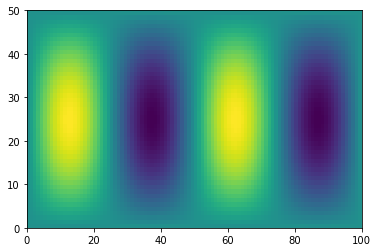

In [27]:
plt.pcolormesh(f)

## Manipulating array dimensions

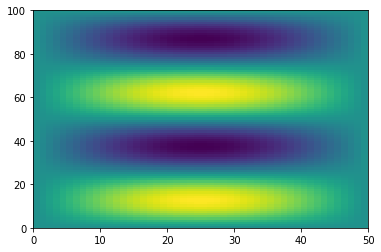

In [29]:
# transpose
plt.pcolormesh(f.T)

In [30]:
# reshape an array (wrong size)
g = np.reshape(f, (8,9))

ValueError: cannot reshape array of size 5000 into shape (8,9)

5000


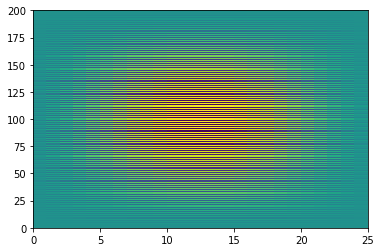

In [31]:
# reshape an array (right size) and mess it up
print(f.size)
g = np.reshape(f, (200,25))
plt.pcolormesh(g)

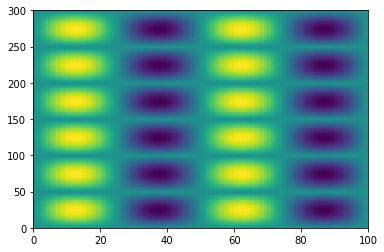

In [32]:
# tile an array
plt.pcolormesh(np.tile(f,(6,1)))

### Broadcasting
Broadcasting is an efficient way to multiply arrays of different sizes

In [33]:
Image(url='http://scipy-lectures.github.io/_images/numpy_broadcasting.png',
     width=720)

In [34]:
# multiply f by x
print(f.shape, x.shape)
g = f * x
print(g.shape)

(50, 100) (100,)
(50, 100)


In [35]:
# multiply f by y
print(f.shape, y.shape)
h = f * y
print(h.shape)

(50, 100) (50,)


ValueError: operands could not be broadcast together with shapes (50,100) (50,) 

In [36]:
# use newaxis special syntax
h = f * y[:,np.newaxis]
print(h.shape)

(50, 100)


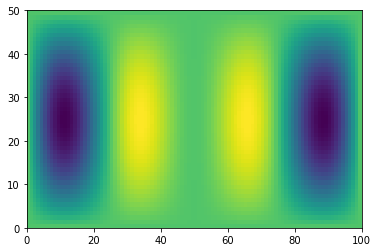

In [37]:
plt.pcolormesh(g)

### Reduction Operations



In [38]:
# sum
g.sum()

-3083.038387807155

In [39]:
# mean
g.mean()

-0.616607677561431

In [40]:
# std
g.std()

1.6402280119141424

In [41]:
# apply on just one axis
g_ymean = g.mean(axis=0)
g_xmean = g.mean(axis=1)

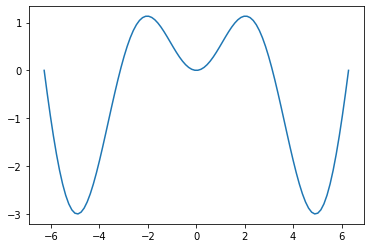

In [42]:
plt.plot(x, g_ymean)

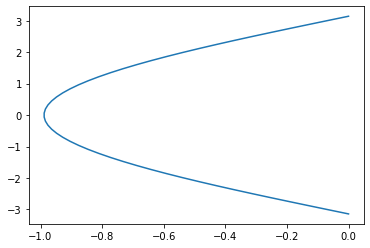

In [43]:
plt.plot(g_xmean, y)

## Fancy Plotting

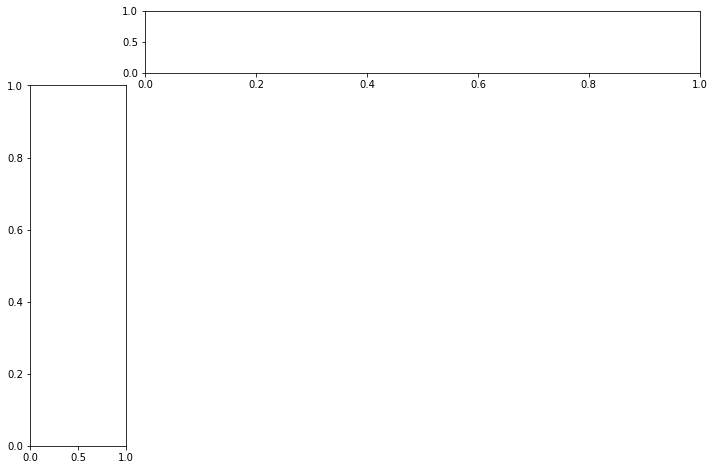

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((6,6),(0,1),colspan=5)
ax2 = plt.subplot2grid((6,6),(1,0),rowspan=5)

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


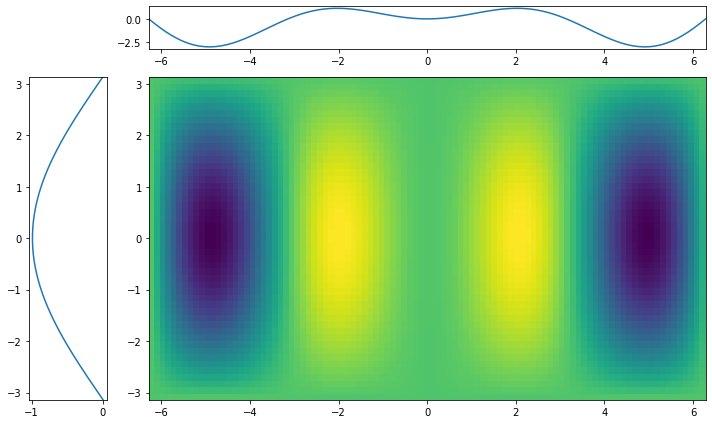

In [45]:
fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot2grid((6,6),(0,1),colspan=5)
ax2 = plt.subplot2grid((6,6),(1,0),rowspan=5)
ax3 = plt.subplot2grid((6,6),(1,1),rowspan=5, colspan=5)

ax1.plot(x, g_ymean)
ax2.plot(g_xmean, y)
ax3.pcolormesh(x, y,  g)

ax1.set_xlim([x.min(), x.max()])
ax3.set_xlim([x.min(), x.max()])
ax2.set_ylim([y.min(), y.max()])
ax3.set_ylim([y.min(), y.max()])

plt.tight_layout()

 ## Real Data

If you haven't got this package installed, you will need to install it:  

In the terminal, activate your working environment  

For me this is pytools_small

```
conda activate pytools_small

conda install -c conda-forge argopy
```

Read the documentation  
https://argopy.readthedocs.io/en/latest/

Read about the data  
https://argo.ucsd.edu/

In [62]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/argopy/stores/filesystems.py:18: UserWarning: argopy needs tqdm installed to display progress bars
  warnings.warn("argopy needs tqdm installed to display progress bars")


In [188]:
ds = argo_loader.float(5906246).to_xarray()
print(ds)



<xarray.Dataset>
Dimensions:                (N_POINTS: 25742)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 25738 25739 25740 25741
    LATITUDE               (N_POINTS) float64 -35.56 -35.56 ... -34.31 -34.31
    LONGITUDE              (N_POINTS) float64 1.129 1.129 1.129 ... 12.26 12.26
    TIME                   (N_POINTS) datetime64[ns] 2020-03-27T15:50:31 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 ... 52 52 52 52 52 52
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 1 ... 52 52 52 52 52 52
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 5906246 5906246 ... 5906246 5906246
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 

In [189]:
ds.keys()

KeysView(<xarray.Dataset>
Dimensions:                (N_POINTS: 25742)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 25738 25739 25740 25741
    LATITUDE               (N_POINTS) float64 -35.56 -35.56 ... -34.31 -34.31
    LONGITUDE              (N_POINTS) float64 1.129 1.129 1.129 ... 12.26 12.26
    TIME                   (N_POINTS) datetime64[ns] 2020-03-27T15:50:31 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 ... 52 52 52 52 52 52
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 1 ... 52 52 52 52 52 52
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 5906246 5906246 ... 5906246 5906246
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1

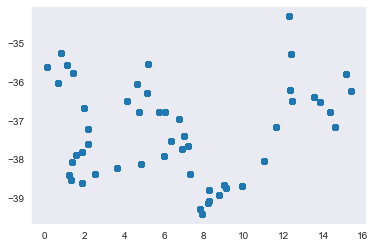

In [190]:
# Look at the trajectory
plt.scatter(ds.LONGITUDE,ds.LATITUDE)

In [191]:
# access some data
T = ds['TEMP'].values  # numpy array

In [210]:
# make some fake missing data

T[T<3.]=np.nan

In [211]:
# inspect the data
# there are "nans", missing data, which screw up our routines

T.max()

nan

In [212]:
T.min()

nan

In [213]:
T

array([19.61499977, 19.61300087, 19.61100006, ...,         nan,
               nan,         nan])

In [214]:
ar_w_mask = np.ma.masked_array([1, 2, 3, 4, 5],
                        mask=[True, True, False, False, False])
ar_w_mask

masked_array(data=[--, --, 3, 4, 5],
             mask=[ True,  True, False, False, False],
       fill_value=999999)

In [215]:
ar_w_mask.mean()

4.0

In [219]:
T_ma = np.ma.masked_invalid(T)
T_ma.max()

19.614999771118164

In [220]:
# load some other data

S =ds['PSAL'].values
P = ds['PRES'].values

Text(0, 0.5, 'Temperature')

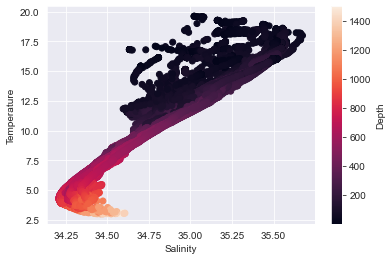

In [231]:
# scatter plot
cs = plt.scatter(S, T, c=P) # name the scatter plot object
plt.grid()
cbar = plt.colorbar(cs) # name the colorbar object

cbar.set_label('Depth')  # label the colorbar


# label thee axes

plt.xlabel('Salinity')
plt.ylabel('Temperature')   # note that if ax is defined, ax.set_xlabel etc...

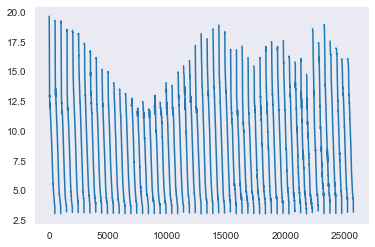

In [237]:
plt.plot(ds.TEMP)

In [241]:
argo_profiles = ds.argo.point2profile() # Convert points to profiles and 
argo_interp = argo_profiles.argo.interp_std_levels([10]) # Interpolate to pressure levels
selected_vars = argo_interp[["LATITUDE", "LONGITUDE", "TIME", "TEMP","PSAL"]] #select relevant variables

/opt/anaconda3/envs/pytools_small/lib/python3.6/site-packages/argopy/utilities.py:769: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  remapped = xr.apply_ufunc(_regular_interp, z, data, z_regridded, **kwargs)


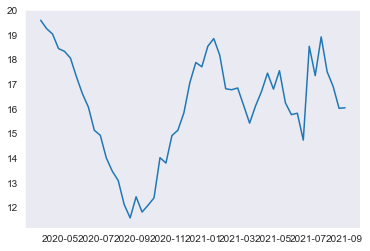

In [245]:
plt.plot(selected_vars.TIME,selected_vars.TEMP)

In [246]:
# date formatting will be a topic for the next lecture